In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Tiền xử lý dữ liệu
# Thêm 1 chiều (28x28 -> 28x28x1) và chuẩn hóa pixel [0,255] -> [0,1]
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

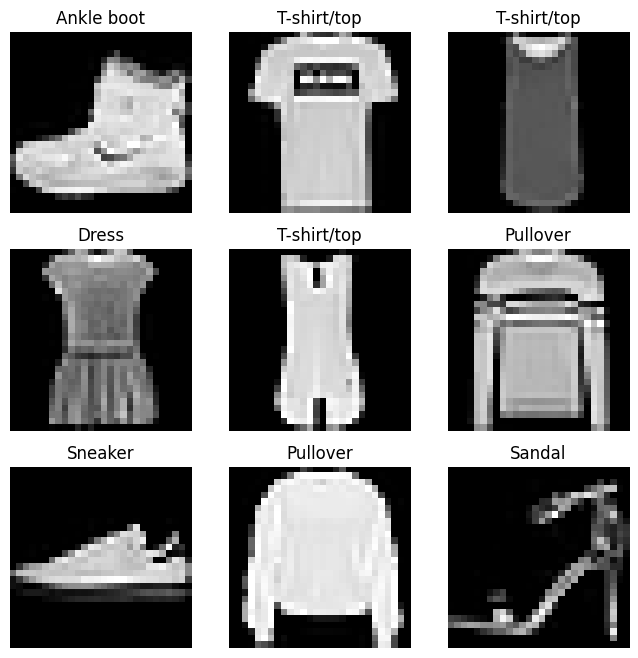

In [5]:
#Hiển thị vài ảnh mẫu
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [6]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 lớp đầu ra
])

In [7]:
#Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Huấn luyện mô hình
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.7736 - loss: 0.6263 - val_accuracy: 0.8761 - val_loss: 0.3445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8851 - loss: 0.3100 - val_accuracy: 0.8904 - val_loss: 0.3035
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9032 - loss: 0.2583 - val_accuracy: 0.8982 - val_loss: 0.2750
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9153 - loss: 0.2279 - val_accuracy: 0.9027 - val_loss: 0.2697
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9241 - loss: 0.2015 - val_accuracy: 0.9102 - val_loss: 0.2482


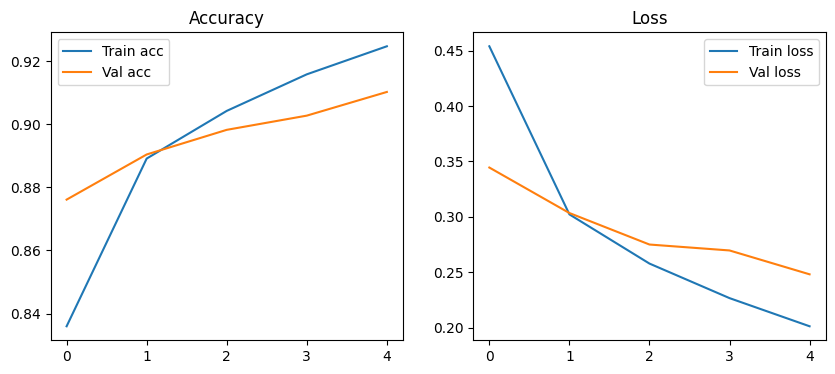

In [8]:
#Vẽ đồ thị kết quả
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [9]:
#Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nĐộ chính xác trên tập test: %.2f%%" % (test_acc * 100))

313/313 - 2s - 7ms/step - accuracy: 0.9102 - loss: 0.2482

Độ chính xác trên tập test: 91.02%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


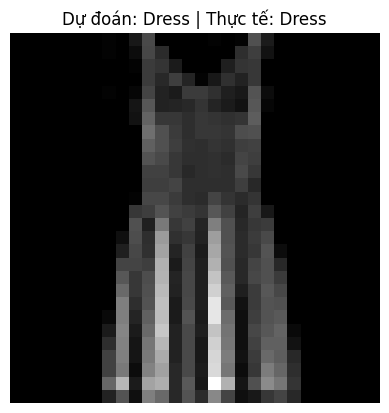

In [11]:
#Thử dự đoán một mẫu ảnh mới
index = np.random.randint(0, len(test_images))
img = test_images[index]
true_label = test_labels[index]
pred = model.predict(img.reshape(1,28,28,1))
pred_label = np.argmax(pred)

plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(f"Dự đoán: {class_names[pred_label]} | Thực tế: {class_names[true_label]}")
plt.axis('off')
plt.show()